In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
df = pd.read_csv('HRDataset.csv')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Zad 1

In [209]:
df_1=df[['ManagerID','PerformanceScore', 'PerfScoreID']]
df_1.dropna(axis=0, inplace=True)
df_1

<ipython-input-209-0c4f9e143e97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.dropna(axis=0, inplace=True)


,ManagerID,PerformanceScore,PerfScoreID
0,1.0,Fully Meets,3.0
1,1.0,Fully Meets,3.0
2,1.0,Fully Meets,3.0
3,1.0,Fully Meets,3.0
4,1.0,Fully Meets,3.0
...,...,...,...
305,7.0,Fully Meets,3.0
306,7.0,Fully Meets,3.0
307,7.0,Fully Meets,3.0
308,7.0,Fully Meets,3.0


In [210]:
pivot=df_1.pivot_table(values='ManagerID',index='ManagerID',columns='PerformanceScore',aggfunc=len)
pivot['number_of_evaluations'] = pivot.sum(axis=1)
pivot['average'] = pivot.mean(axis=1)

# Założenie: aby można było stwierdzić, jakie oceny przeważnie daje dany manager, powinien dać ich co najmniej 5
pivot = pivot.drop(pivot[pivot['number_of_evaluations'] < 5].index)
pivot

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP,number_of_evaluations,average
ManagerID,,,,,,
1.0,NaN,6.0,NaN,NaN,6.0,6.000000
2.0,4.0,13.0,2.0,NaN,19.0,9.500000
4.0,2.0,15.0,NaN,NaN,17.0,11.333333
5.0,2.0,4.0,1.0,NaN,7.0,3.500000
7.0,NaN,13.0,NaN,1.0,14.0,9.333333
10.0,2.0,6.0,1.0,NaN,9.0,4.500000
11.0,3.0,15.0,1.0,2.0,21.0,8.400000
12.0,7.0,9.0,1.0,4.0,21.0,8.400000
13.0,NaN,8.0,NaN,NaN,8.0,8.000000


In [211]:
index_list=pivot.index.tolist()

In [212]:
df_1=df_1[df_1['ManagerID'].isin(index_list)]
df_1

,ManagerID,PerformanceScore,PerfScoreID
0,1.0,Fully Meets,3.0
1,1.0,Fully Meets,3.0
2,1.0,Fully Meets,3.0
3,1.0,Fully Meets,3.0
4,1.0,Fully Meets,3.0
...,...,...,...
305,7.0,Fully Meets,3.0
306,7.0,Fully Meets,3.0
307,7.0,Fully Meets,3.0
308,7.0,Fully Meets,3.0


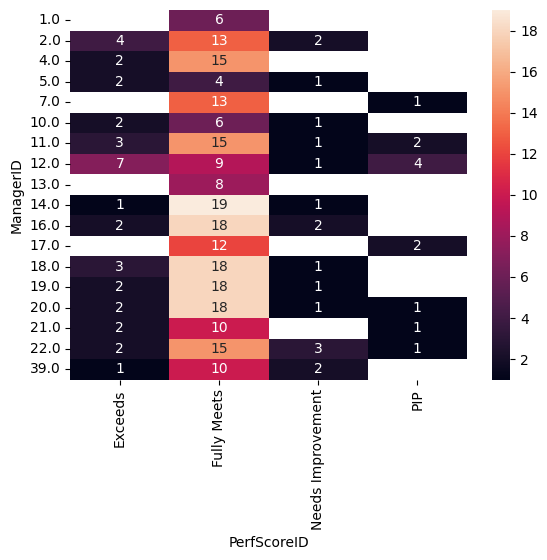

In [213]:
sns.heatmap(pivot[['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP']], annot=True)
plt.xlabel('PerfScoreID')
plt.ylabel('ManagerID')
plt.show()

In [214]:
from pandas_profiling import ProfileReport
profile = ProfileReport(pivot, title="Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

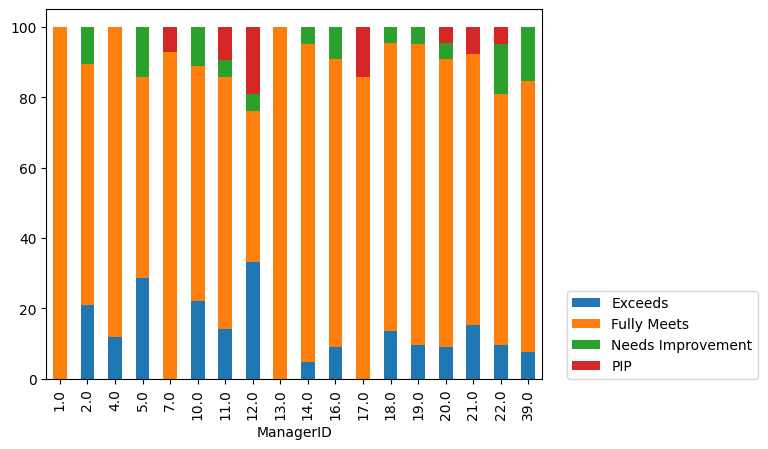

In [215]:
# Usuwamy niepotrzebne już kolumny
pivot.drop(['number_of_evaluations','average'], axis=1, inplace=True)

pivot=pivot.apply(lambda x: 100 * x / float(x.sum()), axis=1)
pivot.plot(kind='bar', stacked=True)
plt.legend(loc=(1.05,0.0))

Analizując oceny poszczególnych managerów można zayważyć, że niektórzy managerowie są bardziej skłonni dać pracownikowi negatywną ocenę, a inni - bardziej pozytywną.

Zad 2

In [216]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

In [217]:
df_2=df[['EmpID','DateofHire','DateofTermination','TermReason','RecruitmentSource']]
df_2=df_2.dropna(subset='DateofHire')
df_2

,EmpID,DateofHire,DateofTermination,TermReason,RecruitmentSource
0,1.103024e+09,10/27/2008,NaN,N/A - still employed,Diversity Job Fair
1,1.106027e+09,1/6/2014,NaN,N/A - still employed,Website Banner Ads
2,1.302053e+09,9/29/2014,NaN,N/A - still employed,Internet Search
3,1.211051e+09,2/16/2015,04/15/15,NaN,Pay Per Click - Google
4,1.307060e+09,5/1/2015,NaN,N/A - still employed,Website Banner Ads
...,...,...,...,...,...
305,1.411071e+09,11/10/2014,NaN,N/A - still employed,Vendor Referral
306,1.108028e+09,11/10/2014,NaN,N/A - still employed,Employee Referral
307,9.040136e+08,6/30/2016,NaN,N/A - Has not started yet,On-campus Recruiting
308,1.308061e+09,11/10/2014,NaN,N/A - still employed,Employee Referral


In [218]:
import datetime as dt

df_2['DateofTermination'] = pd.to_datetime(df_2['DateofTermination'],format='%m/%d/%y')
df_2['DateofHire'] = pd.to_datetime(df_2['DateofHire'],format='%m/%d/%Y')
df_2.loc[df_2['TermReason'] =='N/A - still employed', 'DateofTermination'] = dt.datetime(2019,9,27)

In [219]:
df_2['EmploymentTime']=(df_2['DateofTermination']-df_2['DateofHire'])/np.timedelta64(1,'Y')
df_2=df_2.dropna(subset='EmploymentTime')
df_2

,EmpID,DateofHire,DateofTermination,TermReason,RecruitmentSource,EmploymentTime
0,1.103024e+09,2008-10-27,2019-09-27,N/A - still employed,Diversity Job Fair,10.916035
1,1.106027e+09,2014-01-06,2019-09-27,N/A - still employed,Website Banner Ads,5.722226
2,1.302053e+09,2014-09-29,2019-09-27,N/A - still employed,Internet Search,4.993942
3,1.211051e+09,2015-02-16,2015-04-15,NaN,Pay Per Click - Google,0.158799
4,1.307060e+09,2015-05-01,2019-09-27,N/A - still employed,Website Banner Ads,4.408030
...,...,...,...,...,...,...
304,1.111030e+09,2015-01-05,2015-11-10,Another position,Vendor Referral,0.846013
305,1.411071e+09,2014-11-10,2019-09-27,N/A - still employed,Vendor Referral,4.878950
306,1.108028e+09,2014-11-10,2019-09-27,N/A - still employed,Employee Referral,4.878950
308,1.308061e+09,2014-11-10,2019-09-27,N/A - still employed,Employee Referral,4.878950


In [220]:
print(df_2['DateofTermination'].isnull().sum())

0


In [221]:
pivot_2=df_2.pivot_table(values='EmploymentTime', index='RecruitmentSource', columns=None,aggfunc=[len,'mean'])
pivot_2

,len,mean
,EmploymentTime,EmploymentTime
RecruitmentSource,,
Billboard,16,5.862886
Careerbuilder,1,8.482036
Company Intranet - Partner,1,1.215631
Diversity Job Fair,28,4.537396
Employee Referral,29,5.151608
Glassdoor,14,4.155165
Indeed,8,2.676304
Information Session,4,5.623661


In [222]:
pivot_2 = pivot_2.drop(pivot_2[pivot_2.iloc[:,0] < 3].index)
pivot_2

,len,mean
,EmploymentTime,EmploymentTime
RecruitmentSource,,
Billboard,16,5.862886
Diversity Job Fair,28,4.537396
Employee Referral,29,5.151608
Glassdoor,14,4.155165
Indeed,8,2.676304
Information Session,4,5.623661
Internet Search,6,4.711482
MBTA ads,17,5.729634


In [223]:
pivot_2 = pivot_2.sort_values(by=[('mean', 'EmploymentTime')], ascending=False)
pivot_2

,len,mean
,EmploymentTime,EmploymentTime
RecruitmentSource,,
Other,8,6.720877
Website Banner Ads,12,5.929622
Billboard,16,5.862886
MBTA ads,17,5.729634
Information Session,4,5.623661
Professional Society,20,5.437757
On-campus Recruiting,11,5.166928
Employee Referral,29,5.151608


<Axes: xlabel='RecruitmentSource'>

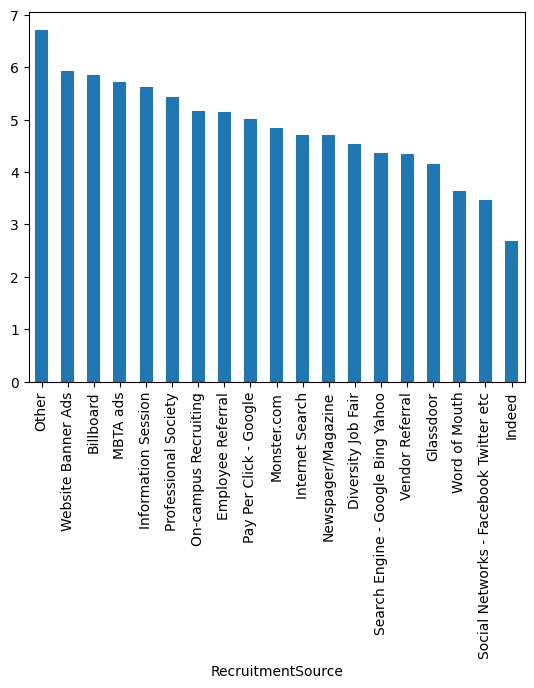

In [224]:
pivot_2[('mean','EmploymentTime')].plot.bar()

Jeśli zależy nam na jak najdłuższym stażu pracowników, to 3 najlepszymi źródłami pozyskiwania pracowników są 'Website Banner Ads', "Billboard" oraz "MBTA ads".

Zad 3

In [225]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

In [226]:
df_3=df[['MaritalDesc','EmpSatisfaction']]
df_3

,MaritalDesc,EmpSatisfaction
0,Married,2.0
1,Divorced,4.0
2,Single,5.0
3,Married,3.0
4,Single,3.0
...,...,...
396,NaN,NaN
397,NaN,NaN
398,NaN,NaN
399,NaN,NaN


In [227]:
df_3.dropna(inplace=True)
df_3['MaritalDesc'].unique()

<ipython-input-227-9e1b8307d559>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3.dropna(inplace=True)


array(['Married', 'Divorced', 'Single', 'Widowed', 'Separated'],
      dtype=object)

In [228]:
df_3['EmpSatisfaction'].unique()

array([2., 4., 5., 3., 1.])

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

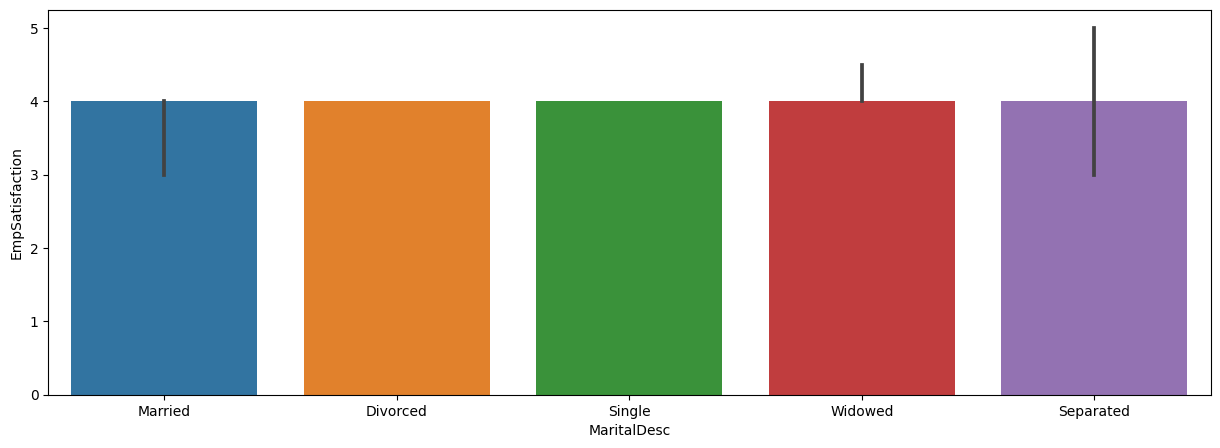

In [229]:
plt.figure(figsize=(15,5))
sns.barplot(x='MaritalDesc',y='EmpSatisfaction', data=df_3, estimator=np.median)

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

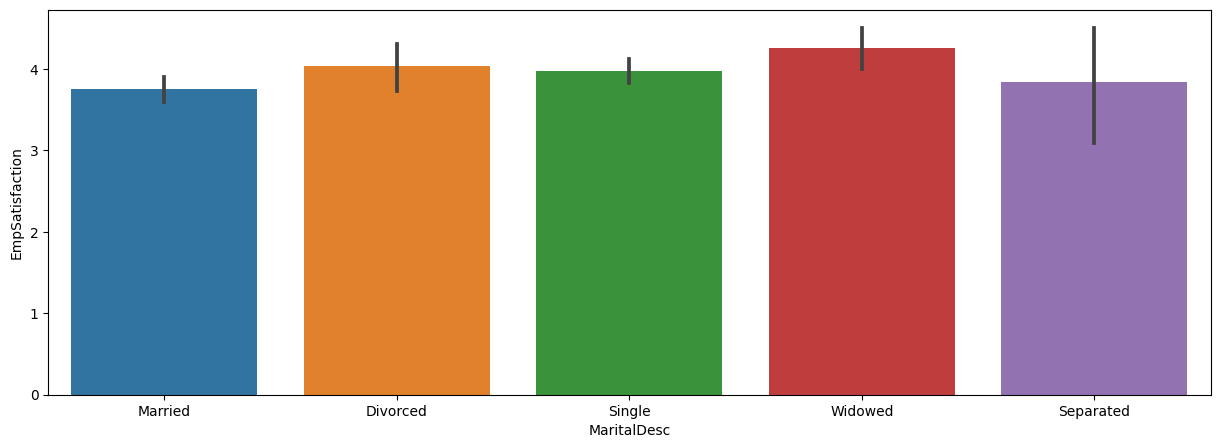

In [230]:
plt.figure(figsize=(15,5))
sns.barplot(x='MaritalDesc',y='EmpSatisfaction', data=df_3)

In [231]:
pivot_3=df_3.pivot_table(values='EmpSatisfaction', index='MaritalDesc', columns='EmpSatisfaction',aggfunc=len)
pivot_3

EmpSatisfaction,1.0,2.0,3.0,4.0,5.0
MaritalDesc,,,,,
Divorced,NaN,1.0,6.0,14.0,9.0
Married,NaN,5.0,54.0,31.0,33.0
Separated,1.0,NaN,4.0,2.0,5.0
Single,1.0,3.0,44.0,40.0,49.0
Widowed,NaN,NaN,NaN,6.0,2.0


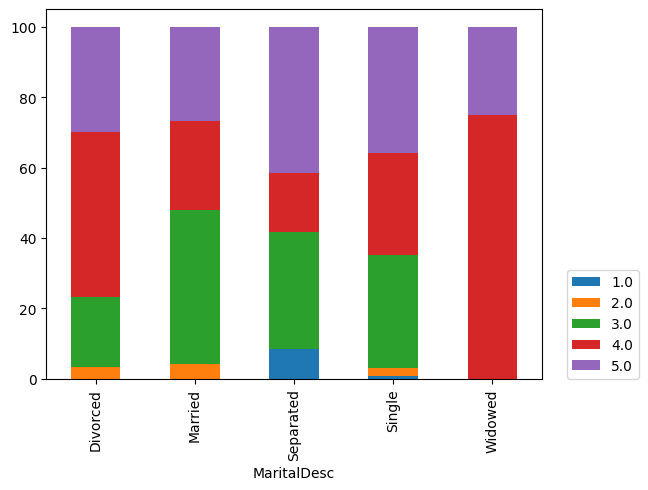

In [232]:
pivot_3=pivot_3.apply(lambda x: 100 * x / float(x.sum()), axis=1)
pivot_3.plot(kind='bar', stacked=True)
plt.legend(loc=(1.05,0.0))

Można zauważyć znaczące różnice w ocenie zadowolenia z pracy w zależności od stanu cywilnego.

Zad 4

In [233]:
df_4=df
df_4.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

Brak danych dotyczących wieku pracowników :) chyba, że mamy na myśli staż pracy:

<Axes: ylabel='Frequency'>

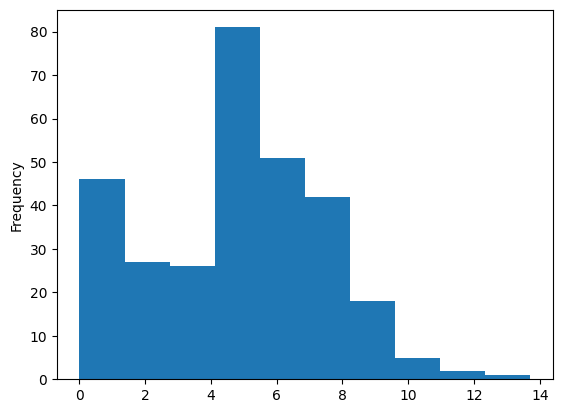

In [234]:
df_4=df_2['EmploymentTime']
df_4.plot.hist()

In [235]:
df_4.describe()

count    299.000000
mean       4.822635
std        2.673155
min        0.005476
25%        2.947357
50%        4.993942
75%        6.373848
max       13.714176
Name: EmploymentTime, dtype: float64

Zad 5

In [236]:
df_5=pd.merge(df_2,df[['EmpID','SpecialProjectsCount']],how='inner')
df_5

,EmpID,DateofHire,DateofTermination,TermReason,RecruitmentSource,EmploymentTime,SpecialProjectsCount
0,1.103024e+09,2008-10-27,2019-09-27,N/A - still employed,Diversity Job Fair,10.916035,6.0
1,1.106027e+09,2014-01-06,2019-09-27,N/A - still employed,Website Banner Ads,5.722226,4.0
2,1.302053e+09,2014-09-29,2019-09-27,N/A - still employed,Internet Search,4.993942,5.0
3,1.211051e+09,2015-02-16,2015-04-15,NaN,Pay Per Click - Google,0.158799,4.0
4,1.307060e+09,2015-05-01,2019-09-27,N/A - still employed,Website Banner Ads,4.408030,5.0
...,...,...,...,...,...,...,...
294,1.111030e+09,2015-01-05,2015-11-10,Another position,Vendor Referral,0.846013,7.0
295,1.411071e+09,2014-11-10,2019-09-27,N/A - still employed,Vendor Referral,4.878950,8.0
296,1.108028e+09,2014-11-10,2019-09-27,N/A - still employed,Employee Referral,4.878950,6.0
297,1.308061e+09,2014-11-10,2019-09-27,N/A - still employed,Employee Referral,4.878950,4.0


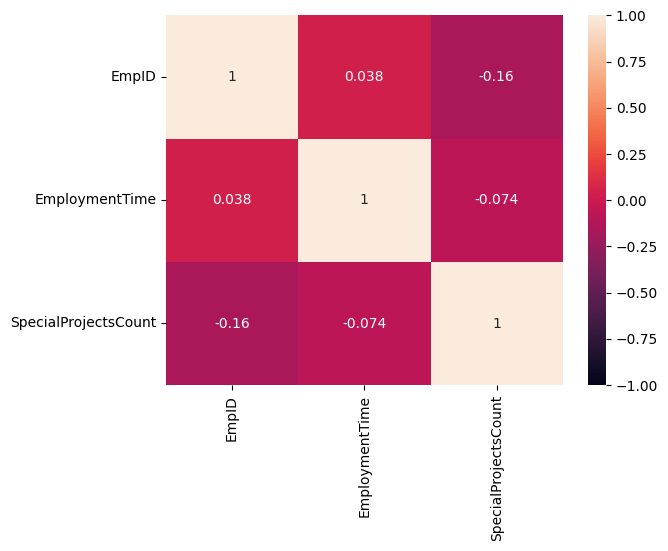

In [237]:
sns.heatmap(df_5.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [238]:
df_5.pivot_table(index='SpecialProjectsCount', values='EmploymentTime',columns=None, aggfunc=[len,'mean', max, min])

,len,mean,max,min
,EmploymentTime,EmploymentTime,EmploymentTime,EmploymentTime
SpecialProjectsCount,,,,
0.0,233,4.916223,13.714176,0.005476
2.0,1,10.724382,10.724382,10.724382
3.0,2,4.221853,4.610635,3.833070
4.0,9,2.981581,5.875548,0.073923
5.0,20,4.938500,9.407448,0.347714
6.0,20,5.146581,10.916035,1.215631
7.0,12,3.284119,6.683231,0.016427
8.0,2,4.687297,4.878950,4.495643


Korelacja pomiędzy stażem pracy a ilością projektów jest bardzo niska.